In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
cash_outlet = pd.read_csv('training.csv')

In [6]:
cash_outlet.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [7]:
cash_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [8]:
cash_outlet.isnull()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
cash_outlet.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
cash_outlet.isnull().values.any()

False

In [8]:
cash_outlet[['Q2', 'mobile_money_classification']]

,Q2,mobile_money_classification
0,2,0
1,1,3
2,2,2
3,1,3
4,1,3
...,...,...
7089,2,1
7090,1,3
7091,2,0
7092,2,3


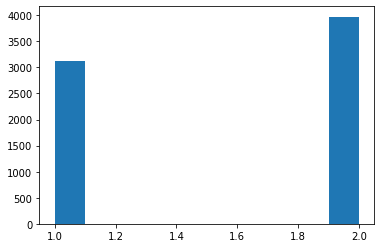

In [82]:

Q2 = cash_outlet.Q2
mobile_money_classification = cash_outlet.mobile_money_classification

plt.hist(Q2)
plt.show()

In [83]:
non_mobile = cash_outlet[(cash_outlet.mobile_money_classification == 0) | (cash_outlet.mobile_money_classification == 1)]

In [90]:
non_mobile

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
5,5462,35,1,1,3,3,2,1,0,1,...,-1,1,1,-6.362331,37.137741,0,0,1,0,1
8,8302,56,2,3,3,3,2,2,0,1,...,-1,1,1,-3.972247,32.649951,0,1,1,0,1
12,8863,28,1,1,3,3,2,2,0,1,...,-1,1,4,-10.743503,34.733084,0,1,1,0,1
13,5469,17,2,1,2,5,2,2,0,1,...,-1,1,4,-8.295917,31.509034,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,8628,34,2,1,1,2,2,2,0,1,...,-1,4,4,-10.793401,38.319854,0,0,0,1,1
7088,8738,65,1,1,3,3,1,1,0,1,...,-1,1,4,-3.031777,33.263513,0,1,0,0,1
7089,8378,57,2,3,3,1,2,2,0,1,...,-1,1,4,-5.811335,35.098103,0,1,0,0,1
7091,6672,22,2,3,3,3,2,2,0,1,...,-1,4,4,-8.303729,31.059642,0,0,0,0,0


(array([1163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2001.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

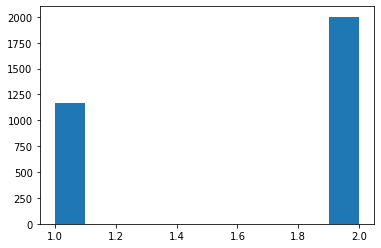

In [100]:
plt.hist(non_mobile.Q2)


(array([712., 643., 523., 354., 266., 279., 180., 154.,  39.,  14.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <a list of 10 Patch objects>)

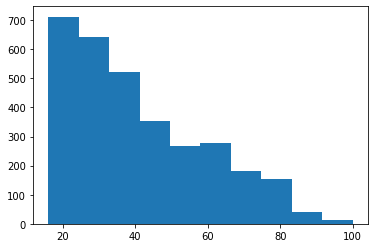

In [99]:
plt.hist(non_mobile.Q1)

(array([ 379.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2785.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

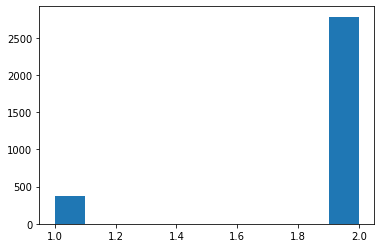

In [101]:
plt.hist(non_mobile.Q6)

In [ ]:
plt.hist(non_mobile.Q1)